In [1]:
import os
import pandas as pd
from glob import glob
from tqdm import tqdm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from trustee import ClassificationTrustee
from trustee.report.trust import TrustReport

In [2]:
# Base path where all method folders are
METHOD = "mpc"
base_path = f'./ABR_Separated/{METHOD}/'

# Collect all merged CSVs
all_dfs = []

print("Loading CSV files...")

# Loop through each ABR method folder
path_pattern = os.path.join(base_path, '*.csv')  # Match all CSVs under each method folder
for file_path in glob(path_pattern):
    try:
        df = pd.read_csv(file_path, dtype=str)
        all_dfs.append(df)
    except Exception as e:
        print(f"Error reading {file_path}: {e}")

Loading CSV files...


In [3]:
# Combine all data
print("Combining CSVs into one DataFrame...")
data = pd.concat(all_dfs, ignore_index=True)
print(f"Total rows loaded: {len(data)}")

Combining CSVs into one DataFrame...
Total rows loaded: 124488


In [4]:
print(data.columns)

Index(['time (ns GMT)', 'session_id', 'index_x', 'expt_id_x', 'channel_x',
       'video_ts', 'format', 'size', 'ssim_index', 'cwnd', 'in_flight',
       'min_rtt', 'rtt', 'delivery_rate', 'source_dataset_x', 'index_y',
       'expt_id_y', 'channel_y', 'event', 'buffer', 'cum_rebuf',
       'source_dataset_y'],
      dtype='object')


In [5]:
# Drop columns
non_mpc_columns = [
    'time (ns GMT)', 'session_id', 'index_x', 'expt_id_x',
    'channel_x', 'video_ts', 'ssim_index', 'source_dataset_x', 'index_y',
    'expt_id_y', 'channel_y', 'source_dataset_y'
]

data = data.drop(columns=non_mpc_columns)
print(data.columns)

Index(['format', 'size', 'cwnd', 'in_flight', 'min_rtt', 'rtt',
       'delivery_rate', 'event', 'buffer', 'cum_rebuf'],
      dtype='object')


In [6]:
# Rename format_x to PlaybackQuality
data["PlaybackQuality"] = data["format"]
data.drop(columns=['format'], inplace=True)

In [7]:
# Encode event_x labels as integers
event_labels = data["event"].unique()
event_to_index = {q: i for i, q in enumerate(event_labels)}
data['event'] = data['event'].map(event_to_index)

In [8]:
# Convert columns to numeric"
for col in tqdm(data.columns, desc="Converting columns to numeric"):
    if col == 'PlaybackQuality':
        continue
    data[col] = pd.to_numeric(data[col], errors='ignore')

print(data.head())

Converting columns to numeric: 100%|██████████| 10/10 [00:00<00:00, 50.36it/s]

      size  cwnd  in_flight  min_rtt    rtt  delivery_rate  event  buffer  \
0   692788    61          0    46798  47318        1771511      0     NaN   
1   221530    47          0    40295  55131        1011604      0     NaN   
2  1192372    27          0    25770  29304        1274852      0     NaN   
3   807355    65          0    46798  47072        1828059      0     NaN   
4   448644    48          0    40295  50293        1123852      0     NaN   

   cum_rebuf PlaybackQuality  
0        NaN     1280x720-20  
1        NaN    1920x1080-22  
2        NaN    1920x1080-22  
3        NaN     1280x720-20  
4        NaN    1920x1080-22  


In [9]:
# Encode labels
le = LabelEncoder()
data['PlaybackQuality'] = le.fit_transform(data['PlaybackQuality'])

# Separate features and labels
X = data.drop(columns=['PlaybackQuality'])
y = data['PlaybackQuality']

In [10]:
# Split
print("Splitting into training and test sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train
print("Training Random Forest Classifier...")
clf = RandomForestClassifier(n_estimators=10, random_state=42)
clf.fit(X_train, y_train)

# Evaluate
print("Evaluating model...")
y_pred = clf.predict(X_test)

Splitting into training and test sets...
Training Random Forest Classifier...
Evaluating model...


findfont: Generic family 'serif' not found because none of the following families were found: Roboto
findfont: Generic family 'serif' not found because none of the following families were found: Roboto
findfont: Generic family 'serif' not found because none of the following families were found: Roboto
findfont: Generic family 'serif' not found because none of the following families were found: Roboto
findfont: Generic family 'serif' not found because none of the following families were found: Roboto
findfont: Generic family 'serif' not found because none of the following families were found: Roboto
findfont: Generic family 'serif' not found because none of the following families were found: Roboto
findfont: Generic family 'serif' not found because none of the following families were found: Roboto
findfont: Generic family 'serif' not found because none of the following families were found: Roboto
findfont: Generic family 'serif' not found because none of the following families were foun

Classification Report:
              precision    recall  f1-score   support

 1280x720-20       0.81      0.86      0.84      7888
 1280x720-22       0.21      0.12      0.16      1005
 1280x720-24       0.21      0.15      0.18       559
 1280x720-26       0.21      0.13      0.16       376
1920x1080-22       0.85      0.93      0.89     12348
1920x1080-24       0.21      0.06      0.09      1058
  426x240-26       0.74      0.91      0.82       868
  640x360-24       0.18      0.09      0.12       169
  640x360-26       0.24      0.16      0.19        69
  854x480-22       0.18      0.07      0.10       111
  854x480-24       0.20      0.11      0.14       229
  854x480-26       0.24      0.11      0.15       218

    accuracy                           0.78     24898
   macro avg       0.36      0.31      0.32     24898
weighted avg       0.74      0.78      0.76     24898



findfont: Generic family 'serif' not found because none of the following families were found: Roboto
findfont: Generic family 'serif' not found because none of the following families were found: Roboto
findfont: Generic family 'serif' not found because none of the following families were found: Roboto
findfont: Generic family 'serif' not found because none of the following families were found: Roboto
findfont: Generic family 'serif' not found because none of the following families were found: Roboto
findfont: Generic family 'serif' not found because none of the following families were found: Roboto
findfont: Generic family 'serif' not found because none of the following families were found: Roboto
findfont: Generic family 'serif' not found because none of the following families were found: Roboto
findfont: Generic family 'serif' not found because none of the following families were found: Roboto
findfont: Generic family 'serif' not found because none of the following families were foun

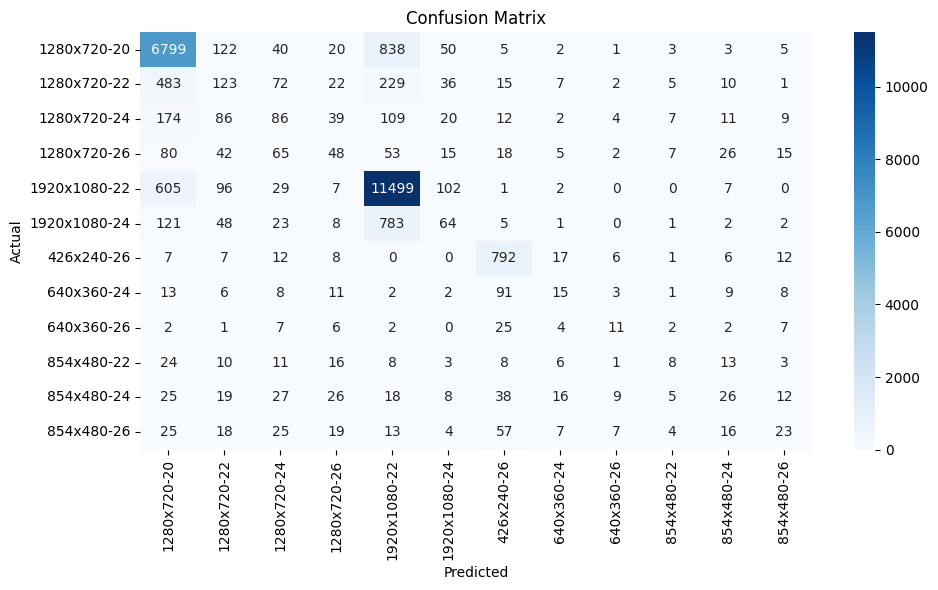

In [11]:
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# TRUSTEE

In [12]:
importances = clf.feature_importances_
feat_names = X.columns

for name, imp in sorted(zip(feat_names, importances), key=lambda x: -x[1])[:20]:
    print(f"{name}: {imp:.4f}")

min_rtt: 0.2911
rtt: 0.2050
size: 0.1934
cwnd: 0.1476
delivery_rate: 0.1464
in_flight: 0.0166
event: 0.0000
buffer: 0.0000
cum_rebuf: 0.0000


In [ ]:
trustee = ClassificationTrustee(expert=clf)
trustee.fit(X_train, y_train, num_iter=50, num_stability_iter=10, samples_size=0.3, verbose=True)
dt, pruned_dt, agreement, reward = trustee.explain()
dt_y_pred = dt.predict(X_test)

print("Fidelity to original model:")
print(classification_report(y_pred, dt_y_pred))

print("Accuracy vs. true labels:")
print(classification_report(y_test, dt_y_pred))

Initializing training dataset using RandomForestClassifier(n_estimators=10, random_state=42) as expert model
Expert model score: 0.9769032060991778
Initializing Trustee outer-loop with 10 iterations
########## Outer-loop Iteration 0/10 ##########
Initializing Trustee inner-loop with 10 iterations
########## Inner-loop Iteration 0/50 ##########
Sampling 20913 points from training dataset with (69713, 69713) entries
Student model 0-0 trained with depth 36 and 3019 leaves:
Student model score: 0.28094980839704503
Student model 0-0 fidelity: 0.28094980839704503
########## Inner-loop Iteration 1/50 ##########
Sampling 20913 points from training dataset with (75987, 75987) entries
Student model 0-1 trained with depth 35 and 3017 leaves:
Student model score: 0.3115660118152343
Student model 0-1 fidelity: 0.3115660118152343
########## Inner-loop Iteration 2/50 ##########
Sampling 20913 points from training dataset with (82261, 82261) entries
Student model 0-2 trained with depth 37 and 2982 lea

In [ ]:
OUTPUT_PATH = "out"
REPORT_PATH = f"{OUTPUT_PATH}/report/trust_report.obj"

if os.path.exists(REPORT_PATH):
    print(f"Loading trust report from {REPORT_PATH}...")
    trust_report = TrustReport.load(REPORT_PATH)
    print("Done!")
else:
    trust_report = TrustReport(
        blackbox=clf,
        X=X,
        y=y,
        X_train=X_train,
        X_test=X_test,
        y_train=y_train,
        y_test=y_test,
        max_iter=5,
        num_pruning_iter=5,
        train_size=0.7,
        trustee_num_iter=10,
        trustee_num_stability_iter=5,
        trustee_sample_size=0.3,
        analyze_branches=True,
        analyze_stability=True,
        top_k=10,
        verbose=True,
        class_names=list(le.classes_),
        feature_names=list(X.columns),
        is_classify=True,
    )

print(trust_report)
trust_report.save(OUTPUT_PATH)

Running Trust Report...
Preparing data...
Done!
Progress |----------------------------------------------------------------------------------------------------| 0.8% Complete
Done!
Progress |█---------------------------------------------------------------------------------------------------| 1.6% Complete
Fitting blackbox model...
Done!
Blackbox model score report with training data:

              precision    recall  f1-score   support

           0      0.852     0.906     0.878      7818
           1      0.282     0.166     0.209      1012
           2      0.275     0.200     0.231       546
           3      0.265     0.208     0.233       379
           4      0.885     0.961     0.922     12469
           5      0.279     0.085     0.130      1049
           6      0.807     0.935     0.867       852
           7      0.287     0.182     0.223       148
           8      0.412     0.256     0.316        82
           9      0.230     0.139     0.173       101
          10      

# AQUA

In [ ]:
importances = clf.feature_importances_
feat_names = X.columns

for name, imp in sorted(zip(feat_names, importances), key=lambda x: -x[1])[:20]:
    print(f"{name}: {imp:.4f}")

min_rtt: 0.2911
rtt: 0.2050
size: 0.1934
cwnd: 0.1476
delivery_rate: 0.1464
in_flight: 0.0166
event: 0.0000
buffer: 0.0000
cum_rebuf: 0.0000


In [ ]:
concept_dict = {
    'Rebuffering': ['cum_rebuf'],
    'Latency': ['min_rtt', 'rtt'],
    'Network': ['cwnd', 'in_flight', 'delivery_rate'],
    'VideoQuality': ['size'],
    'Buffer': ['buffer'],
    'ClientEvent': ['event'],  # if categorical, you may want to one-hot encode
}

for concept, features in concept_dict.items():
    concept_dict[concept] = [f for f in features if f in X.columns]

In [ ]:
def make_concept_features(X, concept_dict, agg='mean'):
    X_concepts = pd.DataFrame(index=X.index)
    for concept, cols in concept_dict.items():
        valid_cols = [col for col in cols if col in X.columns]
        if not valid_cols:
            continue
        if agg == 'mean':
            X_concepts[concept] = X[valid_cols].mean(axis=1)
        elif agg == 'max':
            X_concepts[concept] = X[valid_cols].max(axis=1)
        elif agg == 'sum':
            X_concepts[concept] = X[valid_cols].sum(axis=1)
    return X_concepts

X_test_concepts = make_concept_features(X_test, concept_dict)

In [ ]:
print(X_test_concepts)

        Rebuffering   Latency       Network  VideoQuality  Buffer  ClientEvent
89539           NaN   23649.5  2.282183e+06     1273792.0     NaN          0.0
77980           NaN  113014.0  2.595930e+05      842151.0     NaN          0.0
120837          NaN   65827.0  2.440478e+06     2155302.0     NaN          0.0
8266            NaN   27794.0  4.929700e+05      656261.0     NaN          0.0
61774           NaN   24848.0  3.560049e+06      666278.0     NaN          0.0
...             ...       ...           ...           ...     ...          ...
90361           NaN   27359.5  1.393957e+06      528006.0     NaN          0.0
113106          NaN  167331.5  9.343833e+04       64584.0     NaN          0.0
75472           NaN  111410.5  1.961267e+05      763918.0     NaN          0.0
120657          NaN  124631.0  1.289573e+05      355300.0     NaN          0.0
103497          NaN   85813.5  2.185115e+06     2353195.0     NaN          0.0

[24898 rows x 6 columns]


findfont: Generic family 'serif' not found because none of the following families were found: Roboto
findfont: Generic family 'serif' not found because none of the following families were found: Roboto
findfont: Generic family 'serif' not found because none of the following families were found: Roboto
findfont: Generic family 'serif' not found because none of the following families were found: Roboto
findfont: Generic family 'serif' not found because none of the following families were found: Roboto
findfont: Generic family 'serif' not found because none of the following families were found: Roboto
findfont: Generic family 'serif' not found because none of the following families were found: Roboto
findfont: Generic family 'serif' not found because none of the following families were found: Roboto
findfont: Generic family 'serif' not found because none of the following families were found: Roboto
findfont: Generic family 'serif' not found because none of the following families were foun

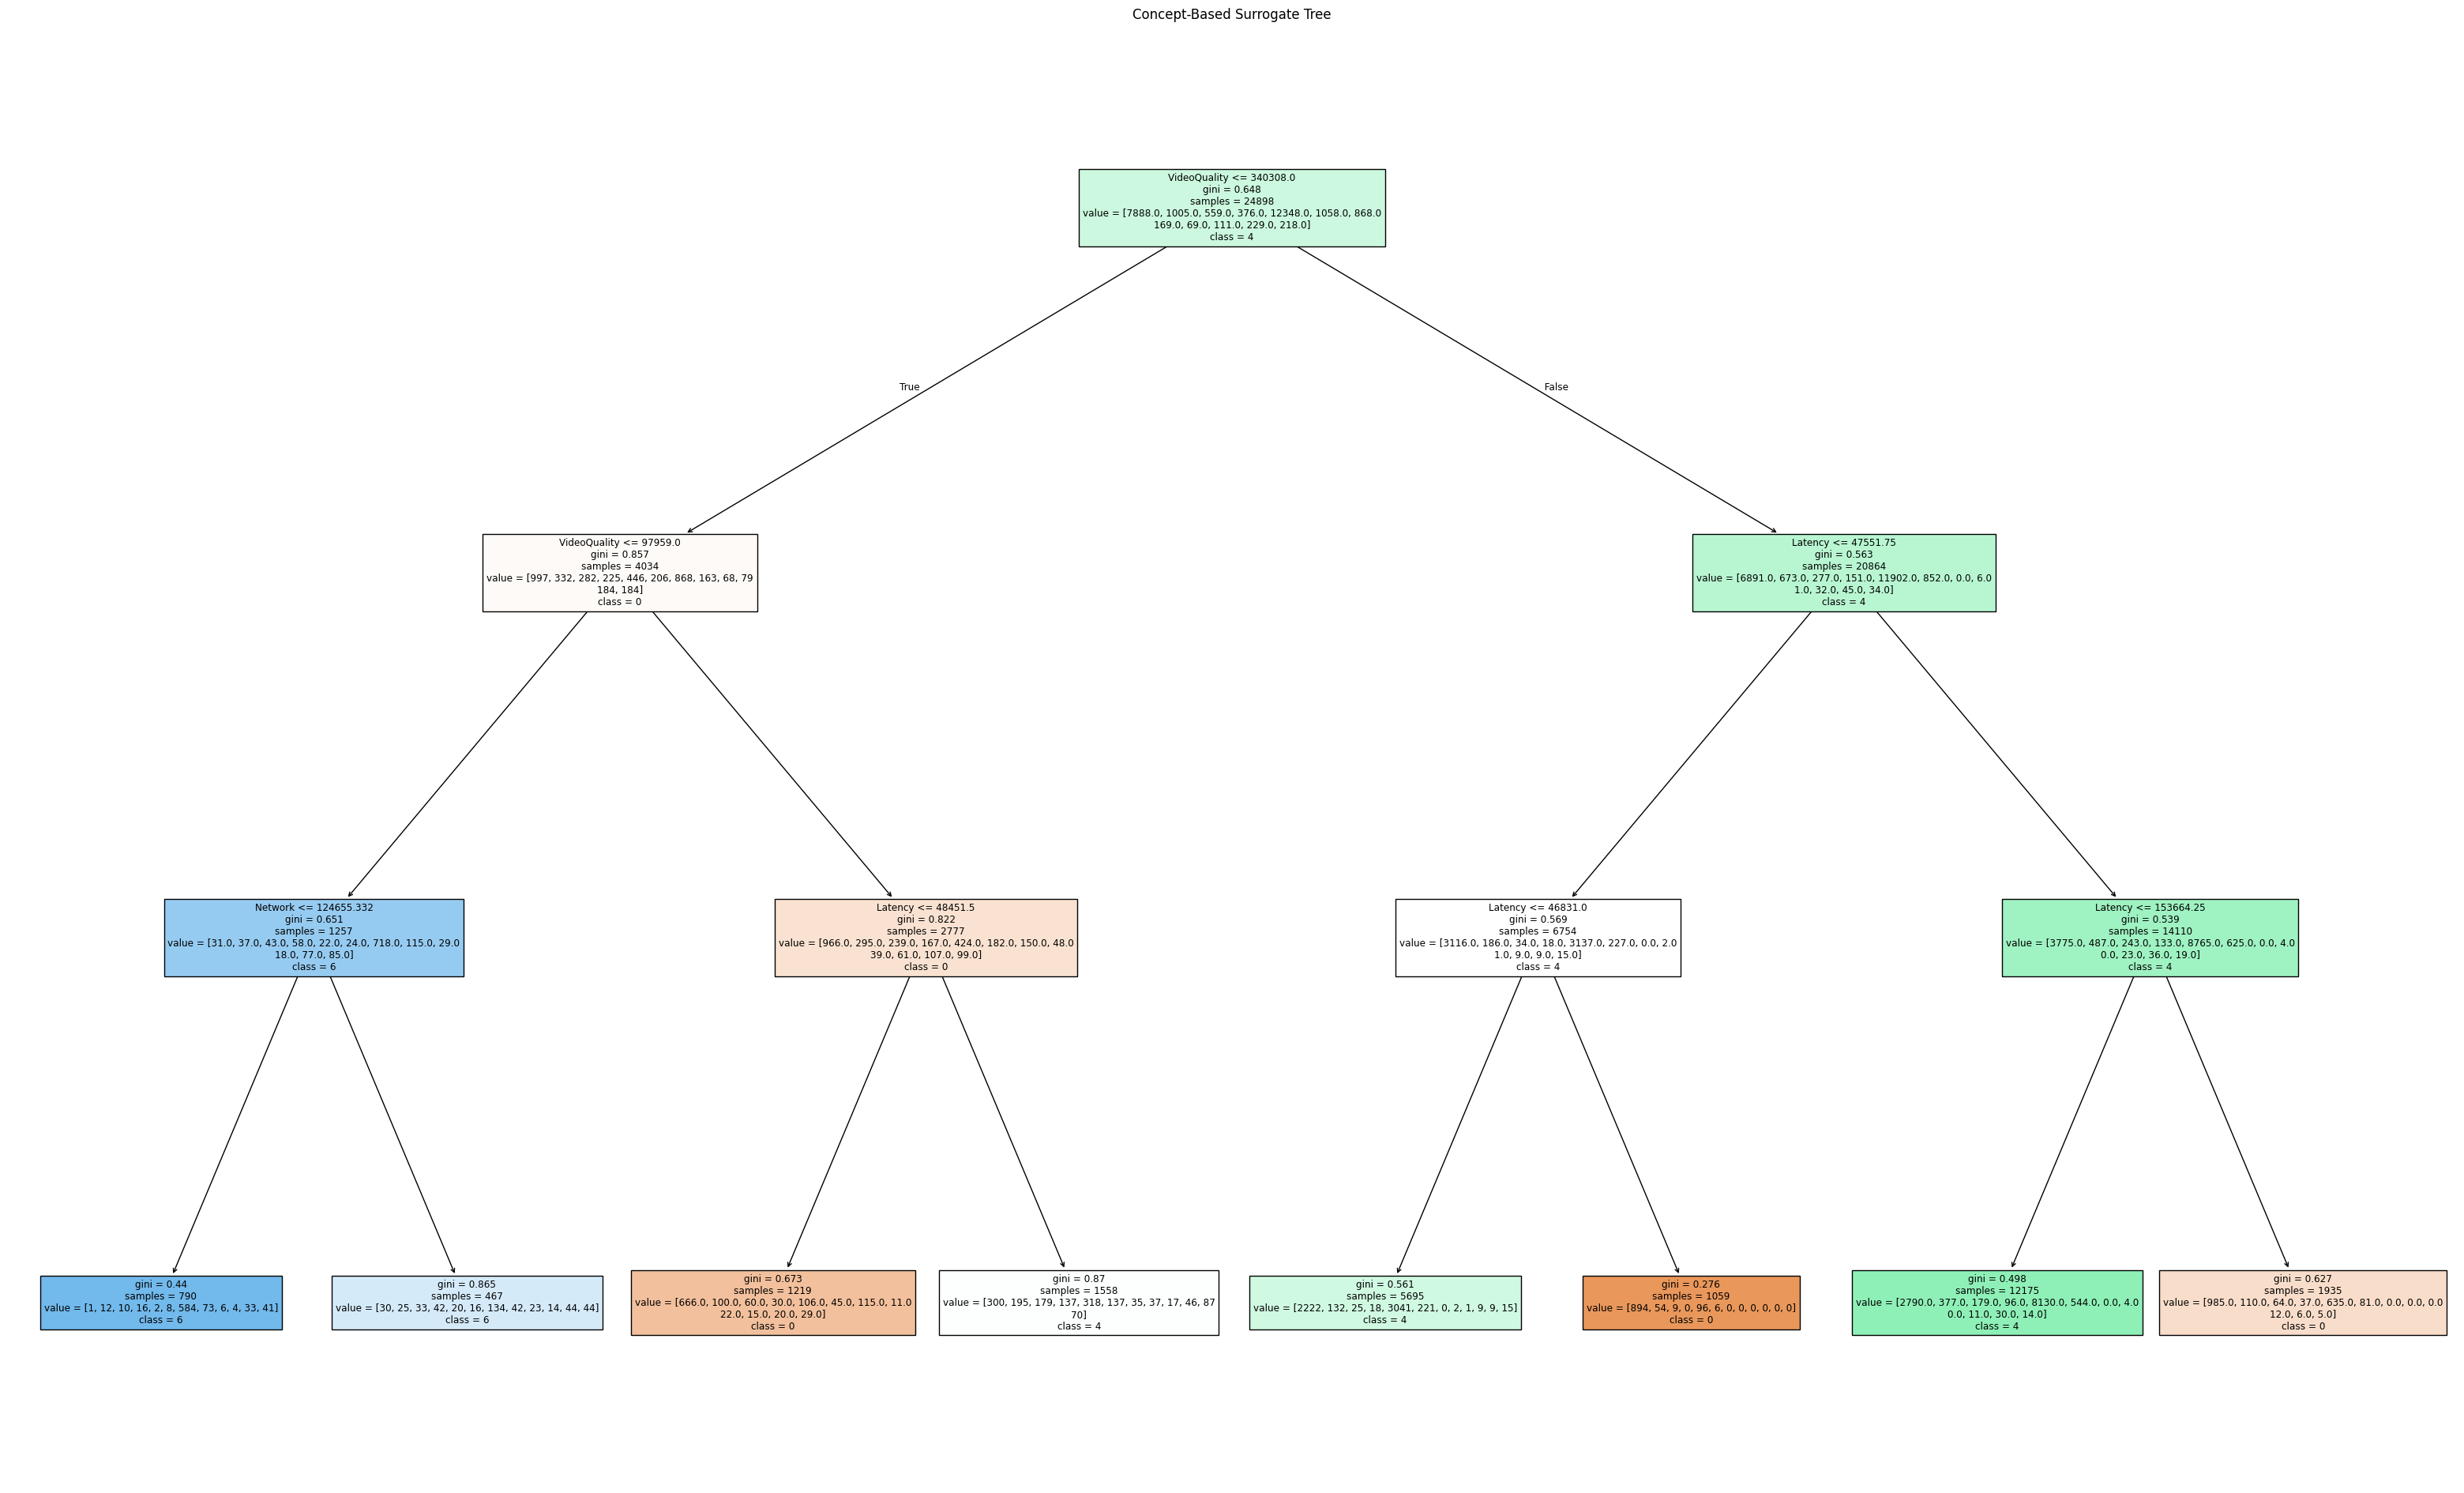

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Train a small decision tree on concept features
surrogate = DecisionTreeClassifier(max_depth=3, random_state=0)
surrogate.fit(X_test_concepts, y_test)

# Visualize the surrogate tree
plt.figure(figsize=(40, 24))
plot_tree(surrogate, 
          feature_names=X_test_concepts.columns, 
          filled=True, 
          class_names=[str(cls) for cls in sorted(y_test.unique())])
plt.title("Concept-Based Surrogate Tree")
plt.show()

findfont: Generic family 'serif' not found because none of the following families were found: Roboto
findfont: Generic family 'serif' not found because none of the following families were found: Roboto
findfont: Generic family 'serif' not found because none of the following families were found: Roboto
findfont: Generic family 'serif' not found because none of the following families were found: Roboto
findfont: Generic family 'serif' not found because none of the following families were found: Roboto
findfont: Generic family 'serif' not found because none of the following families were found: Roboto
findfont: Generic family 'serif' not found because none of the following families were found: Roboto
findfont: Generic family 'serif' not found because none of the following families were found: Roboto
findfont: Generic family 'serif' not found because none of the following families were found: Roboto
findfont: Generic family 'serif' not found because none of the following families were foun

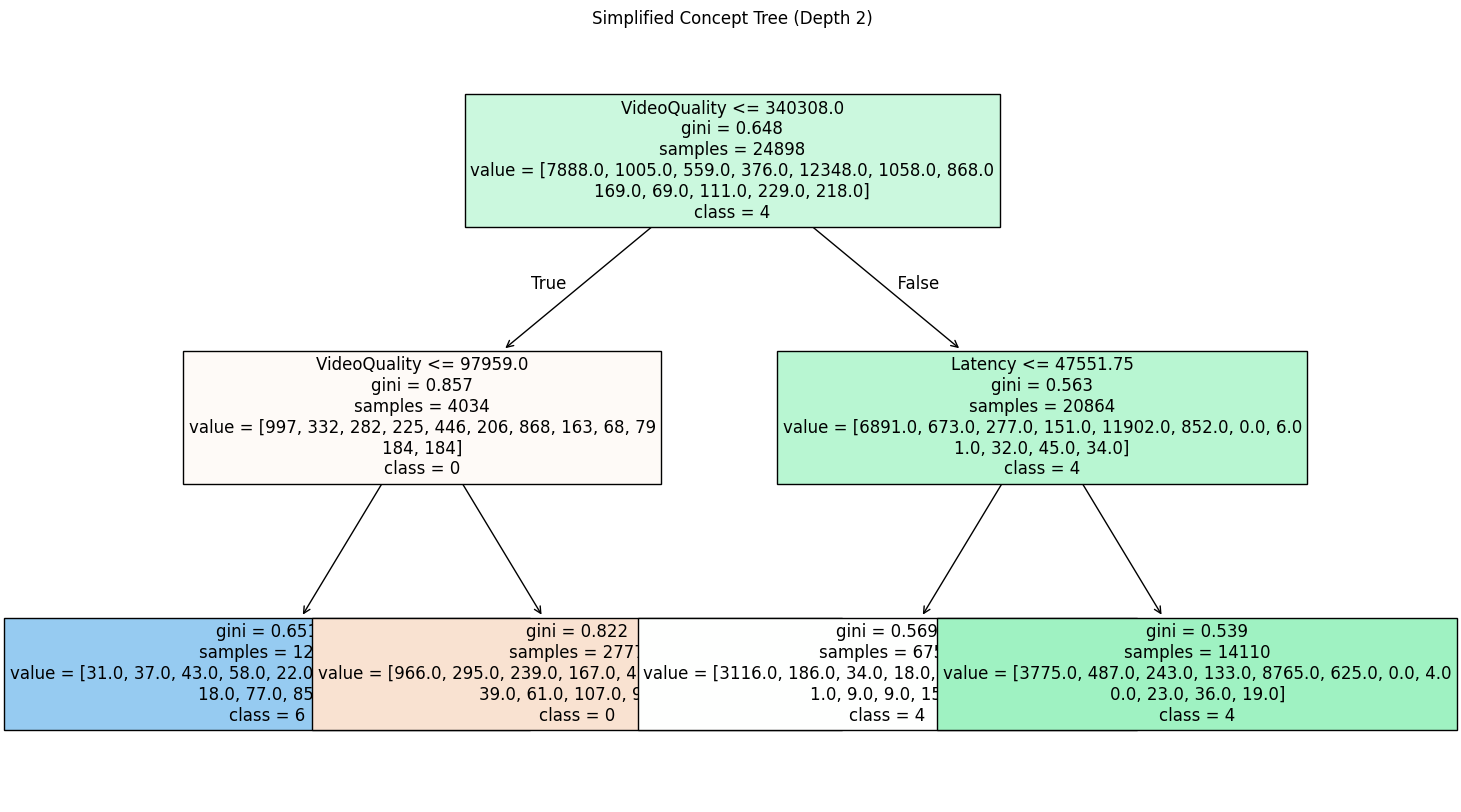

In [ ]:
simpler_tree = DecisionTreeClassifier(max_depth=2, random_state=0)
simpler_tree.fit(X_test_concepts, y_test)

plt.figure(figsize=(16, 10))
plot_tree(
    simpler_tree,
    feature_names=X_test_concepts.columns,
    filled=True,
    class_names=[str(cls) for cls in sorted(y_test.unique())],
    fontsize=12
)
plt.title("Simplified Concept Tree (Depth 2)")
plt.show()